In [1]:
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
from math import sin as sine

In [2]:
# x = { 0 ... 31 }
x = list (range (0, 32))

# π/2 radians (90 degrees)
pi_2 = 3.1415926 / 2

# The increment
alpha = pi_2 / 32

# x_radians = { 0 ... π/2 }
x_radians = list (map (lambda x: alpha * x, x))

# y = { sine (x0) ... , sine (x31) }
y = list (map (lambda x: sine (x), x_radians))

# Normalize, 0 ≤ x ≤ 1
xN = list (map (lambda x: x / pi_2, x_radians))

In [3]:
model = Sequential()

# First layer, one input (x), 5 neurons
model.add(Dense(5, input_dim=1, activation='sigmoid'))

# Second layer, 3 neurons
model.add(Dense(3, activation='sigmoid'))

# One output, y (hopefulle sine (x)!)
model.add(Dense (1, activation='sigmoid'))

# Build our ANN
model.compile (loss='mean_squared_error', optimizer='adam')

model.summary ()


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


2022-03-19 22:43:28.115789: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-19 22:43:28.115876: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
import tensorflow as tf

tf.config.get_visible_devices ()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
h = model.fit (xN, y, verbose = False, epochs=3000)

2022-03-19 22:43:28.253663: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-19 22:43:28.383718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [5]:
def LossHistory (history):
  plt.plot (history.history['loss'], label='Loss')
  plt.xlabel ('Epoch')
  plt.ylabel ('Loss')
  plt.legend ()
  plt.grid (True)
  plt.show ()

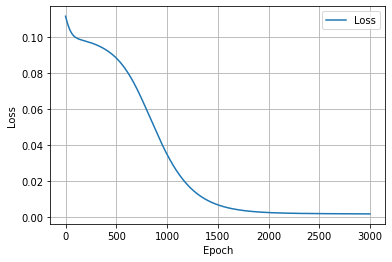

In [6]:
LossHistory (h)